In [105]:
import pickle 
from keras.models import load_model
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [106]:
model = load_model('m2.h5')
tokenizer = pickle.load(open('M2tokenizer.pkl', 'rb'))
history = pickle.load(open('M2history.pkl' , 'rb'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 10)             58340     
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 1000)           4044000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 5834)              5839834   
Total params: 18,947,174
Trainable params: 18,947,174
Non-trainable params: 0
_________________________________________________________________


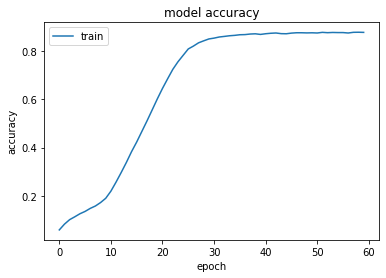

In [107]:
plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

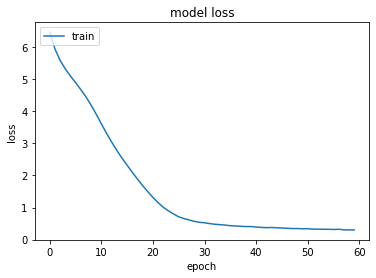

In [108]:
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [114]:
def create_X_Y():
    file = open('TestTC.txt')   #processed book
    data = file.read()
    data = data.replace('\ufeff', "")
    data = data[1:-1]
    sequence_data = tokenizer.texts_to_sequences([data])[0]
    X = []
    Y = []
    for i in range(0 , len(sequence_data)-4):
        word = []
        for j in range(i , i+3):   
            word.append(sequence_data[j])
        X.append(word)
        Y.append(sequence_data[i+3]) 
    
    vocab_size = len(tokenizer.word_index) + 1
    X = np.array(X)
    Y = np.array(Y)
    Y = to_categorical(Y, num_classes=vocab_size)
    
    return X,Y

In [121]:
X,Y = create_X_Y()

Result = model.evaluate(X , Y)

1061/1061 [==============================] - 61s 57ms/step - loss: 6.9863 - accuracy: 0.6369


In [165]:
texts = ["his tall spare" , "i wrote them" , "the little things" , "he never did",
        
        "what is that" , "my name is" , "how are you"
        
        ]

In [166]:
sequence = tokenizer.texts_to_sequences(texts)

sequence = np.array(sequence)
print(sequence.shape)
print(sequence)


(7, 3)
[[ 13 756 757]
 [  4 441  93]
 [  1  64 407]
 [ 10 103  82]
 [ 38  14   9]
 [ 17 233  14]
 [ 91  49  12]]


In [167]:
predict_x = model.predict(sequence) 
classes_x = np.argmax(predict_x,axis=1)
print(classes_x)

[ 608   70    9  253 2651 1116    6]


In [168]:
temp = []
for i in classes_x:
    temp.append([i])

print(tokenizer.sequences_to_texts(temp))

['figure', 'they', 'that', 'wish', 'compared', 'vincent', 'a']
